c:\Users\Compuworld\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.] [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] [ 7.01664866  6.91151815  6.93554526  7.08873001  7.3710724   7.78257243
  8.32323009  8.99304538  9.79201831 10.72014888 11.77743709 12.96388293
 14.2794864  15.72424751]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.] [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] [ 6.60811358  6.3636875   6.24841905  6.26230824  6.40535507  6.67755953
  7.07892163  7.60944137  8.26911874  9.05795374  9.97594638 11.02309666
 12.19940458 13.50487013]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.] [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.] [  0.72946317  -1.60439633  -3.80909819  -5.88464242  -7.83102902
  -9.64825797 -11.33632929 -12.89524298 -14.32499903 -15.62559744
 -16.79703822 -17.83932136 -18.75244687 -19.53641474]
[ 3.83149327  2.61199826  1.52166088  0.56048114 -0.27154096 -0.97440542
 -1.54811225 -1.99266145 -2.30805301 -2.49428693 -2.55136322 -2.47928187
 -2.

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

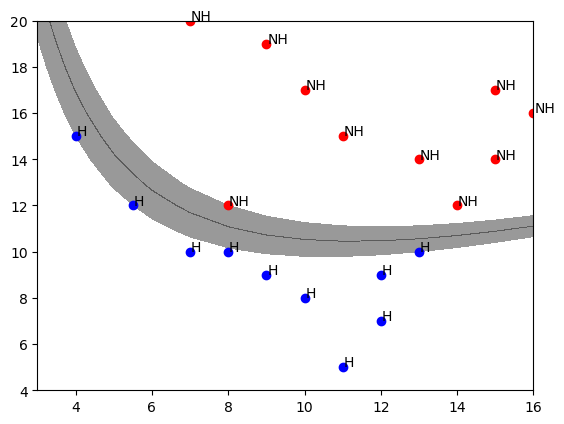

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset2.csv')
X1=df['x1']
X2=df['x2']
X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values
# svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)
svm_classifier = svm.SVC(kernel='poly',C=10, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    print(xx1[0], xx2[0], Z[0])
    print(xx1[1], xx2[1], Z[1])
    print(xx1[-1], xx2[-1], Z[-1])
    print(np.mean(Z, axis=0))
    print(np.max(Z, axis=0))
    print(Z[Z < 0])
    print(np.nonzero(Z < -19))
    m = np.nonzero(Z < -19)
    print(Z[m])
    Q = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    print('Q')
    print(Q)
    print(Q.shape)
    print(xx1.shape)
    print(xx2.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4,linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Decision Trajectories Steps

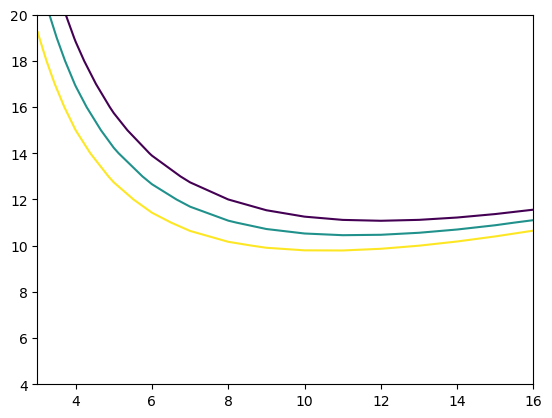

In [2]:
X = X_train
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
Z = svm_classifier.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
contours = plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

In [16]:
for collection in contours.collections[:2]:
    for path in collection.get_paths():
        vertices = path.vertices
        x_coords = vertices[:, 0]
        y_coords = vertices[:, 1]
        print((x_coords, y_coords))

(array([16.        , 15.        , 14.        , 13.        , 12.        ,
       11.        , 10.        ,  9.        ,  8.00114516,  8.        ,
        7.        ,  6.74717764,  6.        ,  5.93388154,  5.35636735,
        5.        ,  4.89510746,  4.53268747,  4.22376653,  4.        ,
        3.96002045,  3.7410314 ]), array([11.55888497, 11.36918012, 11.21909005, 11.1178789 , 11.07794363,
       11.11626064, 11.25671541, 11.53401547, 12.        , 12.00060363,
       12.74125717, 13.        , 13.89851449, 14.        , 15.        ,
       15.73984471, 16.        , 17.        , 18.        , 18.83086284,
       19.        , 20.        ]))
(array([16.        , 15.50553445, 15.        , 14.        , 13.        ,
       12.        , 11.        , 10.        ,  9.        ,  8.20976194,
        8.        ,  7.        ,  6.64366506,  6.        ,  5.75078663,
        5.12728088,  5.        ,  4.66281816,  4.28813442,  4.        ,
        3.9748504 ,  3.72315009,  3.50434907,  3.31255659]), arr

In [17]:
# The Yellow Line
np.c_[x_coords, y_coords]

array([[16.        , 11.10533536],
       [15.50553445, 11.        ],
       [15.        , 10.88515957],
       [14.        , 10.70026713],
       [13.        , 10.55877732],
       [12.        , 10.47168431],
       [11.        , 10.45403791],
       [10.        , 10.52700365],
       [ 9.        , 10.72132062],
       [ 8.20976194, 11.        ],
       [ 8.        , 11.08356332],
       [ 7.        , 11.68830133],
       [ 6.64366506, 12.        ],
       [ 6.        , 12.66133086],
       [ 5.75078663, 13.        ],
       [ 5.12728088, 14.        ],
       [ 5.        , 14.23681299],
       [ 4.66281816, 15.        ],
       [ 4.28813442, 16.        ],
       [ 4.        , 16.90784741],
       [ 3.9748504 , 17.        ],
       [ 3.72315009, 18.        ],
       [ 3.50434907, 19.        ],
       [ 3.31255659, 20.        ]])

## Interpolation Step

- It is better to interpolate the points of decision trajectory
- As an option, we aare applying GaussianProcessRegressor for interpolation task
- Other interpolation algorithms can be investigated

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the kernel
kernel = RBF(length_scale=1.0)

# Create a Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(np.c_[x_coords, y_coords][:,0].reshape(-1,1), np.c_[x_coords, y_coords][:,1])

X_pred = np.linspace(np.min(x_coords), np.max(x_coords), 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(X_pred, return_std=True)

c:\Users\Compuworld\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


### Use Cubic Interpolation

In [18]:
from scipy.interpolate import interp1d

f = interp1d(x_coords, y_coords, kind='cubic')
X_pred = np.linspace(np.min(x_coords), np.max(x_coords), 1000)[:, np.newaxis]
y_pred = f(X_pred)

In [19]:
np.c_[X_pred, y_pred].shape

(1000, 2)

In [20]:
np.c_[x_coords, y_coords].shape

(24, 2)

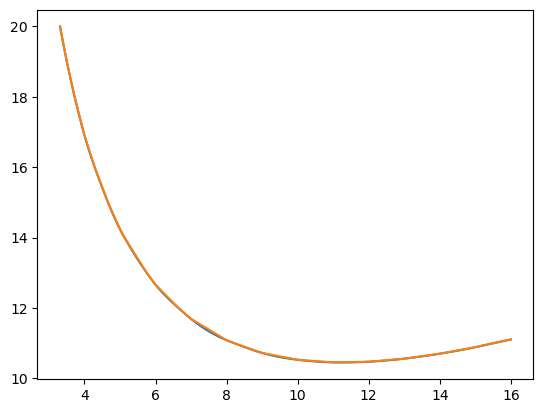

In [21]:
plt.plot(X_pred, y_pred)
plt.plot(x_coords, y_coords)

## Projection Step

In [22]:
from scipy.spatial import KDTree

# Function to find a closest point across the contour
def closest_point(point, contour):
    tree = KDTree(contour)
    closest_index = tree.query(point)[1]
    closest_point = contour[closest_index]
    return closest_point

In [23]:
contour_points = np.c_[X_pred, y_pred]

In [24]:
contour_points.shape

(1000, 2)

In [26]:
closest_point(np.array([10,17]), contour_points)

array([ 4.73497267, 14.82291972])

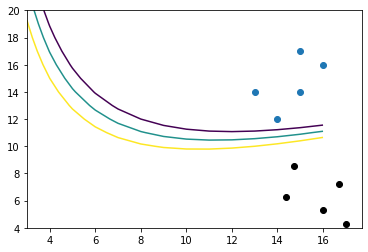

In [300]:
plt.scatter(reflected_points[:,0][5:10], reflected_points[:,1][5:10], color = 'k')
plt.scatter(X_train[:,0][5:10], X_train[:,1][5:10])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

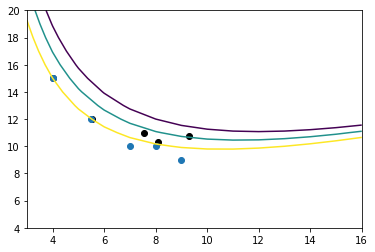

In [286]:
plt.scatter(reflected_points[:,0][10:15], reflected_points[:,1][10:15], color = 'k')
plt.scatter(X_train[:,0][10:15], X_train[:,1][10:15])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

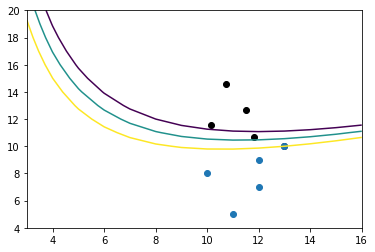

In [268]:
plt.scatter(reflected_points[:,0][15:20], reflected_points[:,1][15:20], color = 'k')
plt.scatter(X_train[:,0][15:20], X_train[:,1][15:20])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

## Another function for reflection

In [269]:
# Define a function to compute the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Define a function to project a point onto a trajectory (find the closest point)
def project_point_onto_trajectory(point, trajectory):
    # Compute the distance between the point and all points on the trajectory
    distances = np.array([euclidean_distance(point, p) for p in trajectory])
    
    # Find the index of the closest point on the trajectory
    closest_index = np.argmin(distances)
    
    # Return the closest point (projection)
    return trajectory[closest_index]

# Define a function to reflect a point across its projection on a trajectory
def reflect_point_across_trajectory(point, trajectory):
    # Find the closest point on the trajectory (projection)
    projection = project_point_onto_trajectory(point, trajectory)
    
    # Calculate the reflection of the point across the projection
    reflection = 2 * projection - point
    
    return reflection

reflected_points_class_new = np.array([reflect_point_across_trajectory(point, contour_points) for point, classof in zip(X_train, y_train) if classof == -1])

In [270]:
reflected_points_class_new.shape

(10, 2)

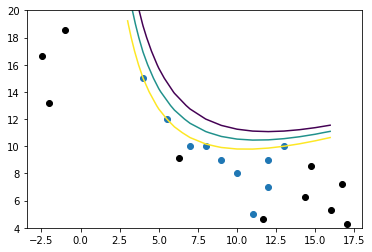

In [271]:
plt.scatter(reflected_points_class_new[:,0], reflected_points_class_new[:,1], color = 'k')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

## Consider class for projection

In [272]:
# Reflect points
reflected_points_class = np.array([reflect_point(point, contour_points) for point, classof in zip(X_train, y_train) if classof == -1])

In [273]:
reflected_points_class.shape

(10, 2)

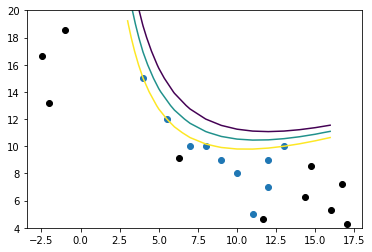

In [274]:
plt.scatter(reflected_points_class[:,0], reflected_points_class[:,1], color = 'k')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

In [275]:
X_train.shape

(20, 2)

## Optimal Personalized Treatment Plan:

For continuous features without constraint:

	- The average of original point and orthogonal projected point is the optimal solution

For continuous features with defining maximum possible changes as constraints (for example x2 can be changed only by 20%):

	- It is possible that for some counterfactual samples, the optimal solution would be infeasible
	- However, we can provide better movement for those infeasible point
	- For better movement of infeasible points should move to the direction of a line that connect the original point to a nearest or near points on the decision trajectory 	 

For having both categorical and numerical features:

	- If we have C categorical features that can not be changes and N features in total, the search space would be N-C

## Close work to this Geometric idea

- Check Counterfactual Explanation

-DiCE: https://github.com/interpretml/DiCE/blob/main/docs/source/notebooks/DiCE_getting_started.ipynb
